### **1. Imports**

In [22]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker


### **2. Data loading**

In [23]:
data = pd.read_csv('data//evaluations.csv', delimiter='|', dtype={"config": str})
data

,prompt_id,log_file,start_time,end_time,gen_time,gen_time_seconds,execution_aborted,build_status,post_build_error,gemini_input_tokens,gemini_output_tokens,gemini_total_tokens,gemini_api_calls,anthropic_input_tokens,anthropic_output_tokens,anthropic_total_tokens,anthropic_api_calls,total_api_calls,config,user_prompt
0,1,prompt_1.log,2025-07-22 12:37:47,2025-07-22 12:51:23,13min 36sec,816,False,success,False,28992,1008,30000,6,1138414,48205,1186619,69,75,linters-off,Create a simple web app called Plant Care Trac...
1,1,prompt_1.log,2025-07-23 13:50:15,2025-07-23 14:01:13,10min 58sec,658,False,success,False,20933,982,21915,6,962658,39613,1002271,77,83,types-off,Create a simple web app called Plant Care Trac...
2,1,prompt_1.log,2025-07-24 20:10:38,2025-07-24 20:16:24,5min 46sec,346,False,success,False,22349,1433,23782,6,134994,13642,148636,25,31,all-on,Create a simple web app called Plant Care Trac...
3,2,prompt_2.log,2025-07-22 21:51:03,2025-07-22 22:01:22,10min 19sec,619,False,success,False,27907,1054,28961,6,962959,33413,996372,61,67,linters-off,Make a Roommate Chore Wheel that randomly assi...
4,2,prompt_2.log,2025-07-23 14:08:41,2025-07-23 14:23:19,14min 38sec,878,False,success,False,29731,889,30620,6,2236555,45924,2282479,123,129,types-off,Make a Roommate Chore Wheel that randomly assi...
5,2,prompt_2.log,2025-07-24 20:21:53,2025-07-24 20:45:50,23min 57sec,1437,True,fail,False,32831,949,33780,6,6154830,57831,6212661,137,143,all-on,Make a Roommate Chore Wheel that randomly assi...
6,3,prompt_3.log,2025-07-23 11:00:35,2025-07-23 11:13:03,12min 28sec,748,False,success,False,22660,950,23610,6,1251805,37280,1289085,109,115,linters-off,Build a dashboard to monitor car maintenance h...
7,3,prompt_3.log,2025-07-23 14:31:22,2025-07-23 14:42:34,11min 12sec,672,False,success,False,39318,1537,40855,6,1326890,43026,1369916,68,74,types-off,Build a dashboard to monitor car maintenance h...
8,3,prompt_3.log,2025-07-24 20:47:10,2025-07-24 21:17:58,30min 48sec,1848,True,fail,False,3603,301,3904,4,10091943,93262,10185205,184,188,all-on,Build a dashboard to monitor car maintenance h...
9,4,prompt_4.log,2025-07-23 13:51:44,2025-07-23 13:59:35,7min 51sec,471,False,success,False,22832,1022,23854,6,403567,21777,425344,45,51,linters-off,Build a simple web app that suggests if tomorr...


### 3. **Performance analysis**

In [24]:
data_group = data.groupby('config')

success_rate = data_group['build_status'].apply(lambda x: (x == 'success').mean()).reset_index(name='success_rate')

success_rate

,config,success_rate
0,all-on,0.733333
1,linters-off,0.800000
2,types-off,0.933333


In [25]:
median_gen_time = data_group['gen_time_seconds'].median().reset_index(name='median_gen_time_sec')
median_gen_time

,config,median_gen_time_sec
0,all-on,845.0
1,linters-off,748.0
2,types-off,562.0


In [26]:
performance_summary = pd.merge(success_rate, median_gen_time, on='config')

performance_summary = performance_summary.sort_values(by=['success_rate', 'median_gen_time_sec'], ascending=[False, True])

performance_summary

,config,success_rate,median_gen_time_sec
2,types-off,0.933333,562.0
1,linters-off,0.800000,748.0
0,all-on,0.733333,845.0


##### Performance observations: 
- **types-off**: Success rate of 0.933 (93.3%) and median generation time of 562 seconds.
- **linters-off**: Success rate of 0.800 (80%) and median generation time of 748 seconds.
- **all-on**: Success rate of 0.733 (73.3%) and median generation time of 845 seconds.

**tpes-off** — highest success rate and fastest generation time (median).

### **4. Performance visualization**

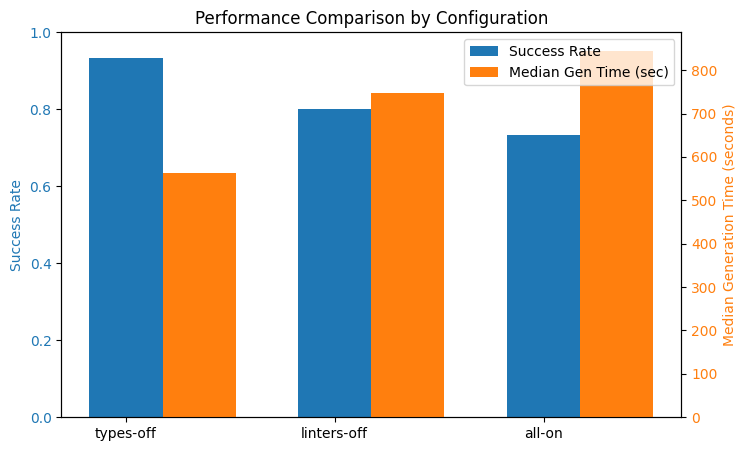

In [27]:
fig, ax1 = plt.subplots(figsize=(8, 5))

configs = performance_summary['config']
success_rates = performance_summary['success_rate']
avg_times = performance_summary['median_gen_time_sec']

bar_width = 0.35
index = range(len(configs))

bars1 = ax1.bar(index, success_rates, bar_width, label='Success Rate', color='tab:blue')
ax1.set_ylabel('Success Rate', color='tab:blue')
ax1.set_ylim(0, 1)
ax1.set_xticks(index)
ax1.set_xticklabels(configs)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
bars2 = ax2.bar([i + bar_width for i in index], avg_times, bar_width, label='Median Gen Time (sec)', color='tab:orange')
ax2.set_ylabel('Median Generation Time (seconds)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title('Performance Comparison by Configuration')
plt.show()

##### Bar-chart observations:
- **Types-off** configuration has the highest success rate and shortest generation time, indicating the best performance.
- **Linters-off** configuration shows moderate success rate and generation time, ranking in the middle.
- **All-on** configuration has the lowest success rate and longest generation time, performing the worst overall.

### **5. Overall performance insights**

In [28]:
data_group.get_group("linters-off")[["gen_time_seconds", "anthropic_input_tokens", "anthropic_output_tokens", "anthropic_total_tokens"]].describe()

,gen_time_seconds,anthropic_input_tokens,anthropic_output_tokens,anthropic_total_tokens
count,15.000000,1.500000e+01,15.000000,1.500000e+01
mean,729.666667,1.728261e+06,38602.400000,1.766863e+06
std,248.570389,1.640858e+06,16499.349843,1.654220e+06
min,301.000000,2.221010e+05,12327.000000,2.344280e+05
25%,565.000000,6.059470e+05,24765.000000,6.327970e+05
50%,748.000000,1.138414e+06,37280.000000,1.186619e+06
75%,885.500000,2.122678e+06,50401.500000,2.178708e+06
max,1167.000000,5.409317e+06,68921.000000,5.478238e+06


In [29]:
data_group.get_group("types-off")[["gen_time_seconds", "anthropic_input_tokens", "anthropic_output_tokens", "anthropic_total_tokens"]].describe()

,gen_time_seconds,anthropic_input_tokens,anthropic_output_tokens,anthropic_total_tokens
count,15.000000,1.500000e+01,15.000000,1.500000e+01
mean,622.333333,1.134301e+06,35606.200000,1.169908e+06
std,211.260728,9.048506e+05,14194.271436,9.185939e+05
min,390.000000,3.409680e+05,18747.000000,3.597150e+05
25%,497.500000,5.299385e+05,27111.000000,5.586405e+05
50%,562.000000,8.057910e+05,31490.000000,8.372810e+05
75%,665.000000,1.300502e+06,41319.500000,1.340748e+06
max,1170.000000,3.627368e+06,76330.000000,3.703698e+06


In [30]:
data_group.get_group("all-on")[["gen_time_seconds", "anthropic_input_tokens", "anthropic_output_tokens", "anthropic_total_tokens"]].describe()

,gen_time_seconds,anthropic_input_tokens,anthropic_output_tokens,anthropic_total_tokens
count,15.000000,1.500000e+01,15.000000,1.500000e+01
mean,872.000000,1.947404e+06,34769.200000,1.982173e+06
std,444.457293,2.732954e+06,21552.225703,2.753358e+06
min,346.000000,1.349940e+05,13642.000000,1.486360e+05
25%,463.500000,4.361365e+05,20188.000000,4.563245e+05
50%,845.000000,8.510950e+05,28938.000000,8.768770e+05
75%,1167.000000,1.753496e+06,39486.500000,1.792982e+06
max,1848.000000,1.009194e+07,93262.000000,1.018520e+07


##### Generation Time (seconds):

- **types-off** configuration has the lowest average generation time (~622s), with relatively less variation (std ~211s).
- **linters-off** configuration is slightly slower on average (~730s) with moderate variation (std ~249s).
- **all-on** configuration is the slowest on average (~872s) and shows the highest variability (std ~444s), indicating inconsistent performance.

##### Token Usage (Anthropic API):

- **all-on** configuration uses the highest average number of input tokens (~1.95M) and total tokens (~1.98M), with very high variability, suggesting heavier and more  inconsistent token consumption.
- **linters-off** configuration has moderate token usage (~1.73M input, ~1.77M total) with moderate variability.
- **types-off** configuration uses the least tokens on average (~1.13M input, ~1.17M total) and shows the lowest variability, indicating more efficient and consistent token usage.

##### Output Tokens:

- Output tokens are roughly similar across all three, around 34k to 38k on average, with linters-off slightly higher (~38.6k) and all-on slightly lower (~34.7k).

### **6. Generation time visualization:**

In [31]:
def human_format(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.0f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

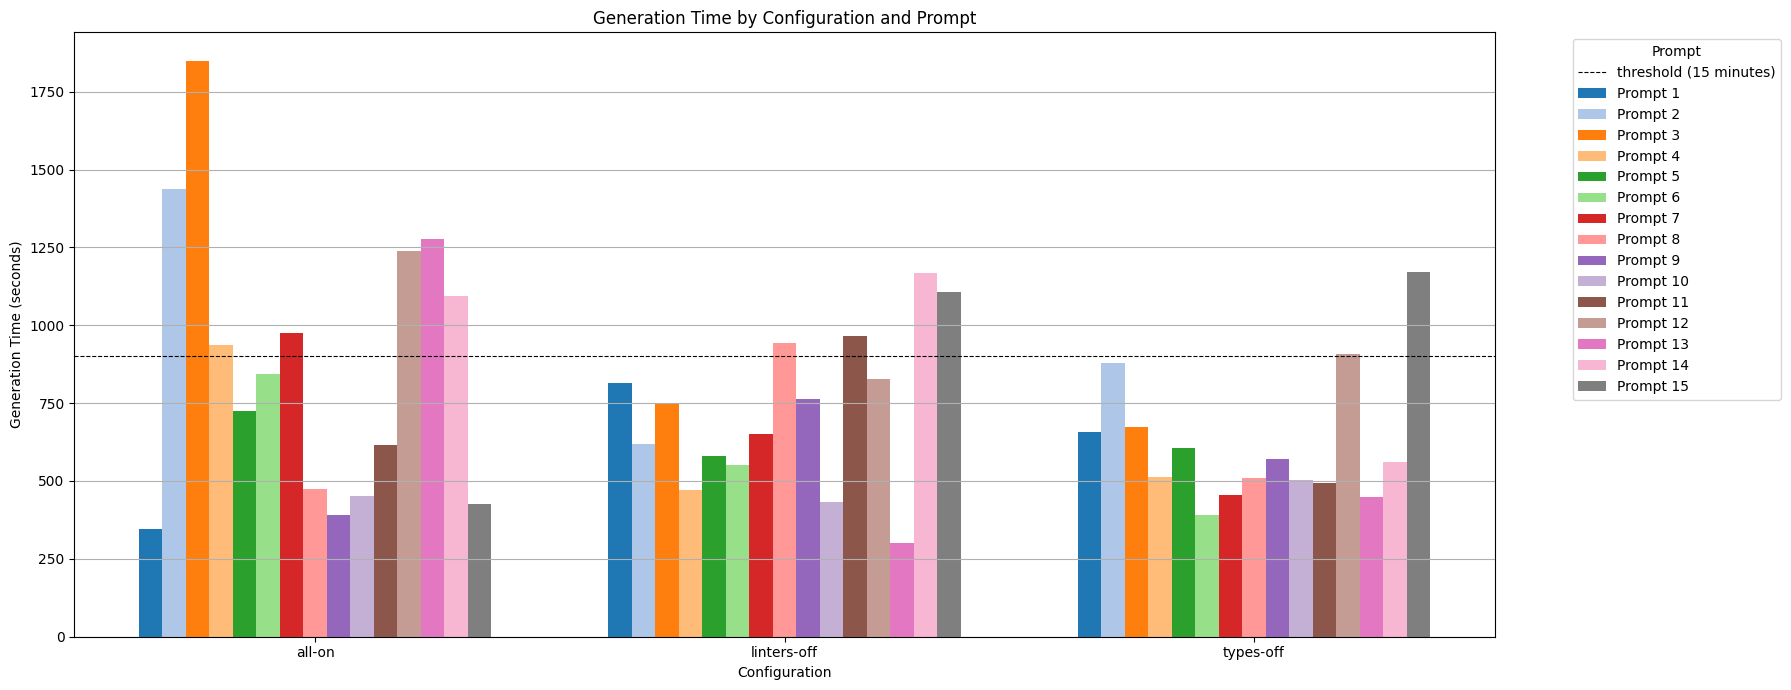

In [32]:
prompts_to_plot = sorted(data['prompt_id'].unique())

plot_data = data[data['prompt_id'].isin(prompts_to_plot)]

configs = sorted(plot_data['config'].unique())
num_configs = len(configs)
num_prompts = len(prompts_to_plot)

gen_time_matrix = np.zeros((num_configs, num_prompts))
for i, config in enumerate(configs):
    for j, prompt in enumerate(prompts_to_plot):
        val = plot_data[(plot_data['config'] == config) & (plot_data['prompt_id'] == prompt)]['gen_time_seconds']
        gen_time_matrix[i, j] = val.values[0] if not val.empty else np.nan

palette = sns.color_palette("tab20", num_prompts)

bar_width = 0.05
x = np.arange(num_configs)

plt.figure(figsize=(18, 7))
for j in range(num_prompts):
    plt.bar(x + j * bar_width, gen_time_matrix[:, j], width=bar_width, color=palette[j], label=f'Prompt {prompts_to_plot[j]}')

plt.xlabel('Configuration')
plt.ylabel('Generation Time (seconds)')
plt.title('Generation Time by Configuration and Prompt')
plt.axhline(y=900, color='black', linewidth=0.8, linestyle='--', label='threshold (15 minutes)')
plt.xticks(x + bar_width * (num_prompts - 1) / 2, configs)
plt.legend(title='Prompt', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Generation time observations: 
- **All-on** configuration shows the highest generation times, with several prompts exceeding the 15-minute threshold.
- **Linters-off** configuration generally has moderate generation times, often below the threshold but with some variability.
- **Types-off** configuration tends to have the lowest and most consistent generation times across most prompts.
- Prompts 3, 13, 14, and 15 consistently take longer across all configurations, especially in **all-on**.
- Overall, **types-off** is the fastest and most stable configuration in terms of generation time.

### **7. Token consumption visualization:**

#### **A. Overall token consumption visualization:**

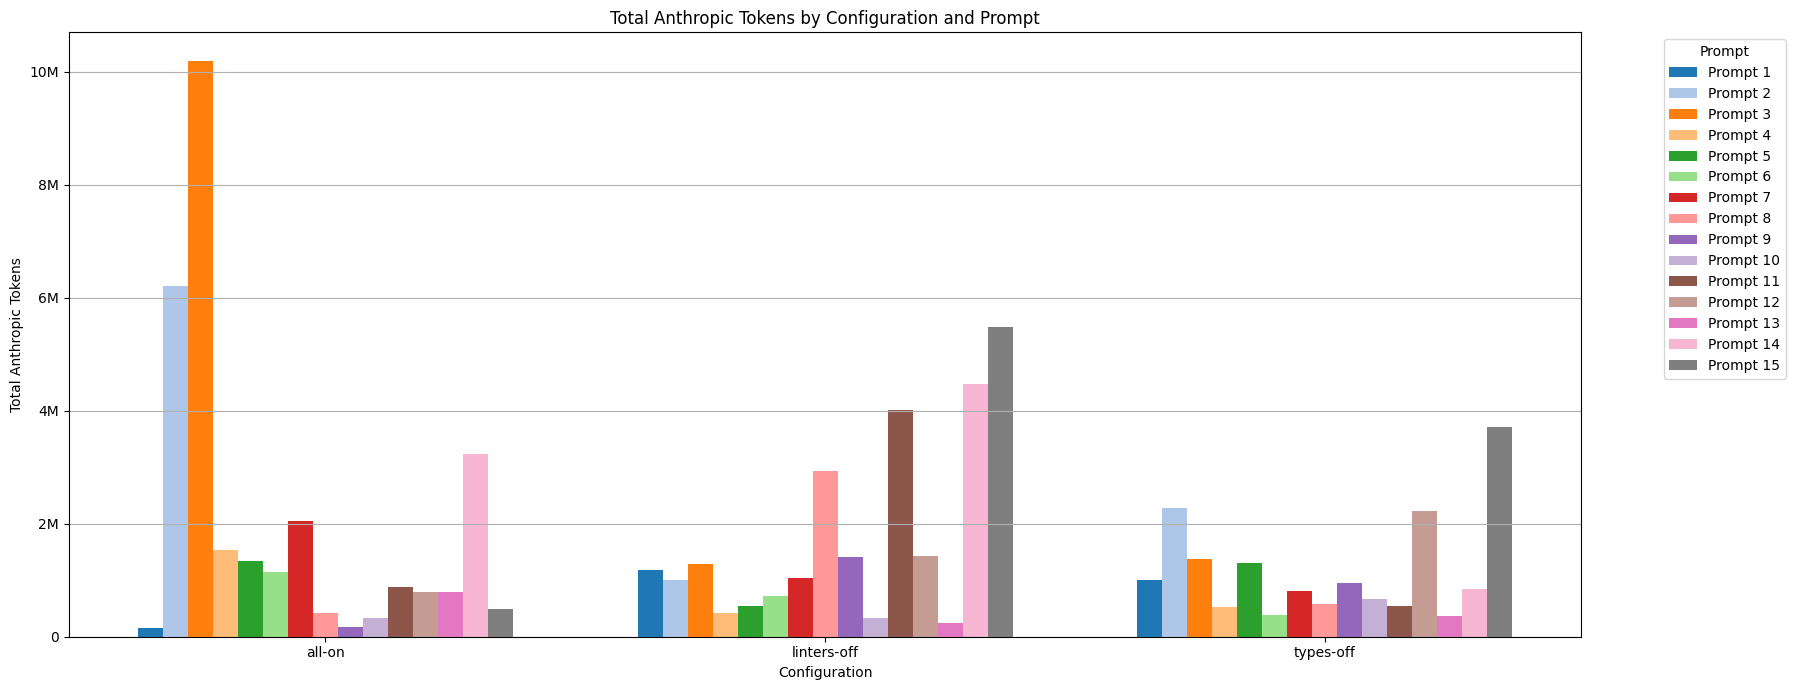

In [33]:
tokens_matrix = np.zeros((num_configs, num_prompts))
for i, config in enumerate(configs):
    for j, prompt in enumerate(prompts_to_plot):
        val = plot_data[(plot_data['config'] == config) & (plot_data['prompt_id'] == prompt)]['anthropic_total_tokens']
        tokens_matrix[i, j] = val.values[0] if not val.empty else np.nan

plt.figure(figsize=(18, 7))
for j in range(num_prompts):
    plt.bar(x + j * bar_width, tokens_matrix[:, j], width=bar_width, color=palette[j], label=f'Prompt {prompts_to_plot[j]}')

plt.xlabel('Configuration')
plt.ylabel('Total Anthropic Tokens')
plt.title('Total Anthropic Tokens by Configuration and Prompt')
plt.xticks(x + bar_width * (num_prompts - 1) / 2, configs)
plt.legend(title='Prompt', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(human_format))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Overall token consumtion observations:
- **All-on** configuration consumes the highest number of tokens for nearly all prompts, often by a large margin, making it the least efficient.
- **Linters-off** configuration shows moderate token usage, higher than **types-off** but significantly lower than **all-on**.
- **Types-off** configuration consistently uses the fewest tokens across most prompts, indicating the most efficient token consumption.
- For optimal performance balancing token usage and efficiency, **types-off** is the best choice, followed by **linters-off**.
- **All-on** configuration’s high token consumption suggests it is the least optimal configuration.

#### **B. Input and output token consumption visualizations:**

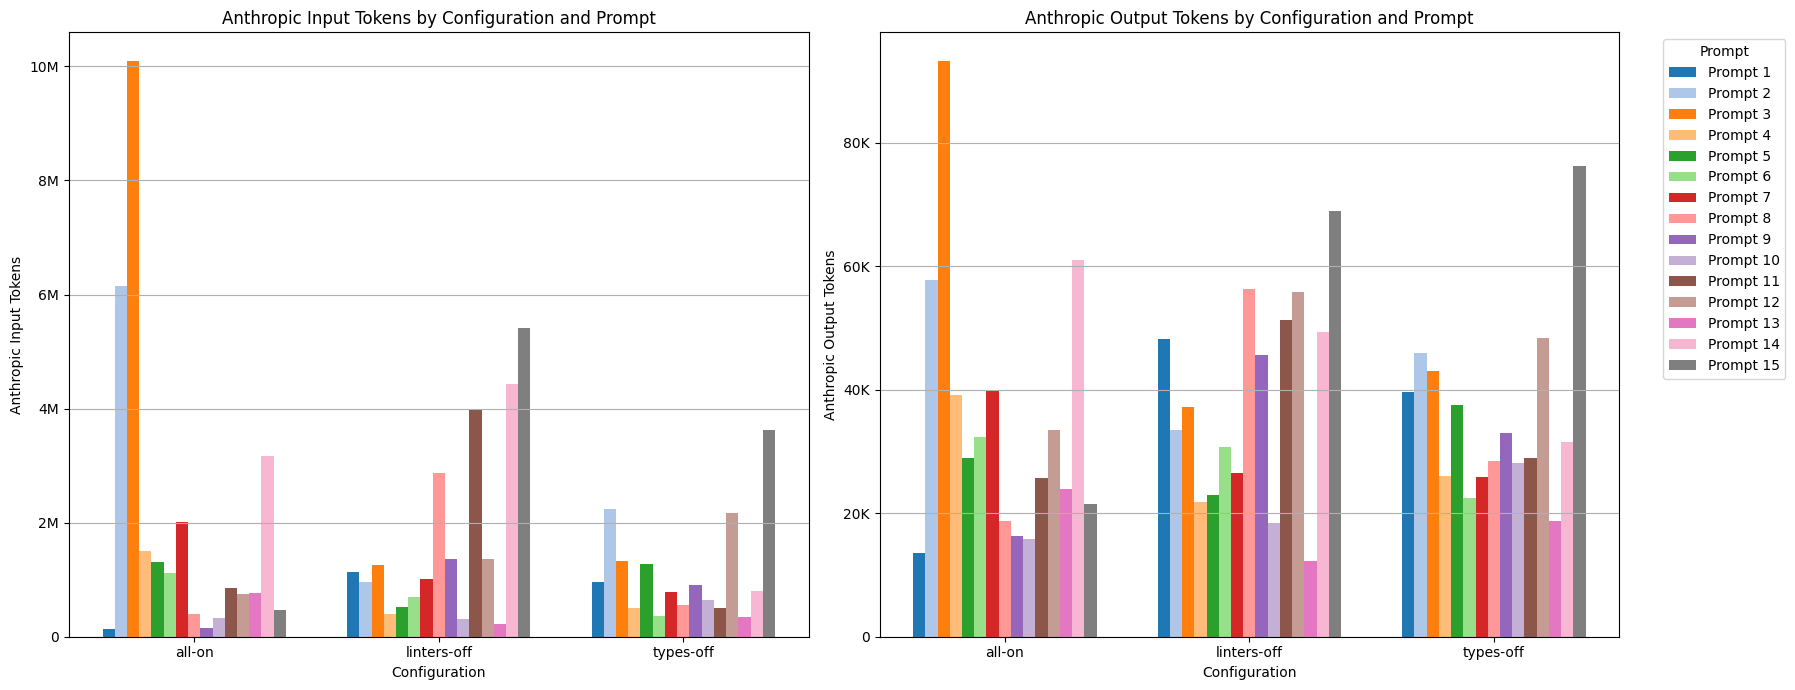

In [34]:
prompts_to_plot = sorted(data['prompt_id'].unique())
plot_data = data[data['prompt_id'].isin(prompts_to_plot)]
configs = sorted(plot_data['config'].unique())
num_configs = len(configs)
num_prompts = len(prompts_to_plot)
palette = sns.color_palette("tab20", num_prompts)

def plot_grouped_bars(ax, metric_col, ylabel, title):
    matrix = np.zeros((num_configs, num_prompts))
    for i, config in enumerate(configs):
        for j, prompt in enumerate(prompts_to_plot):
            val = plot_data[(plot_data['config'] == config) & (plot_data['prompt_id'] == prompt)][metric_col]
            matrix[i, j] = val.values[0] if not val.empty else np.nan

    bar_width = 0.05
    x = np.arange(num_configs)

    for j in range(num_prompts):
        ax.bar(x + j * bar_width, matrix[:, j], width=bar_width, color=palette[j], label=f'Prompt {prompts_to_plot[j]}')

    ax.set_xlabel('Configuration')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + bar_width * (num_prompts - 1) / 2)
    ax.set_xticklabels(configs)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(human_format))
    ax.grid(axis='y')

fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=False)

plot_grouped_bars(axes[0], 'anthropic_input_tokens', 'Anthropic Input Tokens', 'Anthropic Input Tokens by Configuration and Prompt')
plot_grouped_bars(axes[1], 'anthropic_output_tokens', 'Anthropic Output Tokens', 'Anthropic Output Tokens by Configuration and Prompt')

axes[1].legend(title='Prompt', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

##### Input token observations (Left Chart):
- **All-on** configuration consistently uses the highest number of input tokens across most prompts.
- **Linters-off** and **types-off** configurations use significantly fewer input tokens compared to **all-on**.
- **Types-off** configuration generally has the lowest input token usage, indicating more efficient input processing.
- Some prompts, like Prompt 3 and Prompt 14, show especially high input token counts in **all-on**.
- Lower input token usage in **types-off** suggests potential cost and speed advantages.

##### Output token observations (Right Chart):
- Output token usage is more balanced across all three configurations.
- No single configuration consistently uses the most output tokens across all prompts.
- Some prompts, such as Prompt 3 and Prompt 15, have higher output token counts across configurations.
- Differences in output tokens are less pronounced than input tokens, indicating output size is less affected by configuration.
- Overall, output token usage is relatively stable regardless of configuration choice.

### **8. Generation time & overall token consumption visuallization (a different view):**

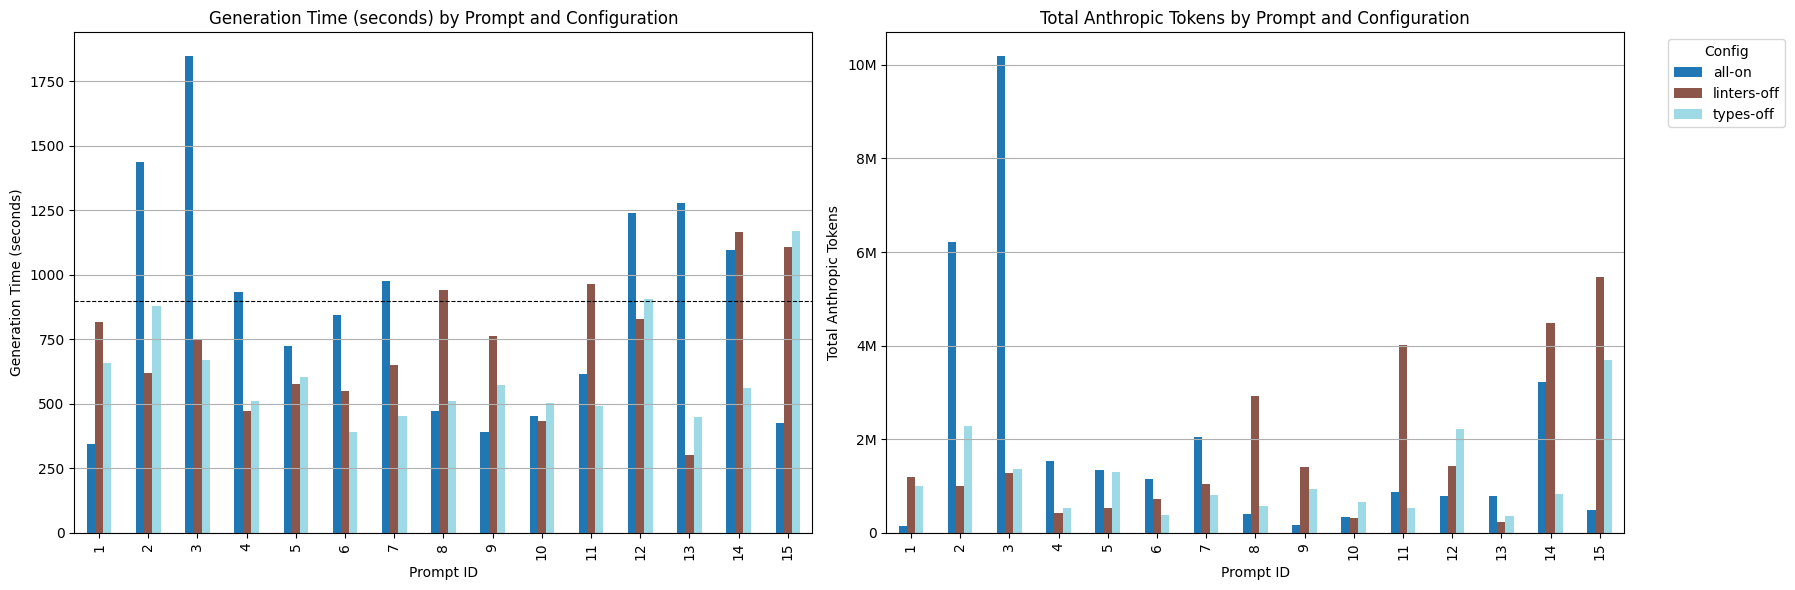

In [35]:
pivot_time = data.pivot(index='prompt_id', columns='config', values='gen_time_seconds')
pivot_tokens = data.pivot(index='prompt_id', columns='config', values='anthropic_total_tokens')

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

pivot_time.plot(kind='bar', stacked=False, colormap='tab20', ax=axes[0])
axes[0].set_title('Generation Time (seconds) by Prompt and Configuration')
axes[0].set_xlabel('Prompt ID')
axes[0].set_ylabel('Generation Time (seconds)')
axes[0].axhline(y=900, color='black', linewidth=0.8, linestyle='--', label='threshold (15 minutes)')
axes[0].grid(axis='y')

pivot_tokens.plot(kind='bar', stacked=False, colormap='tab20', ax=axes[1])
axes[1].set_title('Total Anthropic Tokens by Prompt and Configuration')
axes[1].set_xlabel('Prompt ID')
axes[1].set_ylabel('Total Anthropic Tokens')
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(human_format))
axes[1].grid(axis='y')

axes[1].legend(title='Config', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].legend_.remove()

plt.tight_layout()
plt.show()

*above are the same charts with a different view*

### **9. Distribution of app generation time by configuration & distribution of overall token consumption by configuration visualizations:**

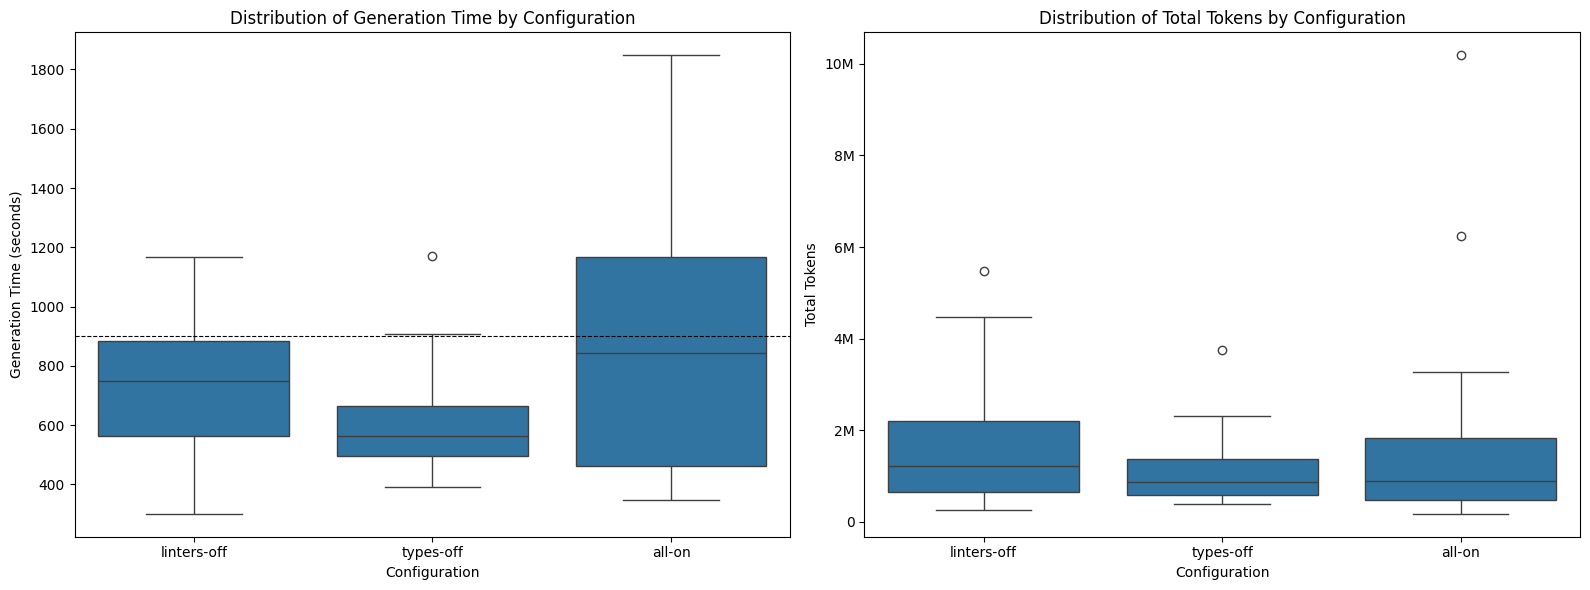

In [36]:
data_copy = data.copy()

data_copy['total_tokens'] = data_copy['gemini_total_tokens'] + data_copy['anthropic_total_tokens']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='config', y='gen_time_seconds', data=data_copy, ax=axes[0])
axes[0].set_title('Distribution of Generation Time by Configuration')
axes[0].set_xlabel('Configuration')
axes[0].axhline(y=900, color='black', linewidth=0.8, linestyle='--', label='threshold (15 minutes)')
axes[0].set_ylabel('Generation Time (seconds)')

sns.boxplot(x='config', y='total_tokens', data=data_copy, ax=axes[1])
axes[1].set_title('Distribution of Total Tokens by Configuration')
axes[1].set_xlabel('Configuration')
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(human_format))
axes[1].set_ylabel('Total Tokens')

plt.tight_layout()
plt.show()

##### Distribution of generation time by configuration (left plot):
- **Types-off** configuration has the lowest median generation time and the smallest variability, indicating consistent and faster performance.
- **Linters-off** configuration shows a higher median generation time than **types-off** but lower than **all-on**, with moderate spread.
- **All-on** configuration has the highest median generation time and the widest range, showing slower and less consistent generation times.
- The 15-minute threshold (dashed line) is crossed more frequently by **all-on**, indicating more timeouts or long runs.

##### Distribution of total tokens by configuration (right plot):
- **Types-off** has the lowest median total token usage and the tightest distribution, reflecting efficient token consumption.
- **Linters-off** and **all-on** have higher median token usage with greater variability.
- **All-on** shows several extreme outliers with very high token counts, indicating occasional heavy resource use.
- Overall, **types-off** is the most efficient and stable in terms of token consumption.

### **10. Scatter plot of overall token consumption vs generation time by configuration:**

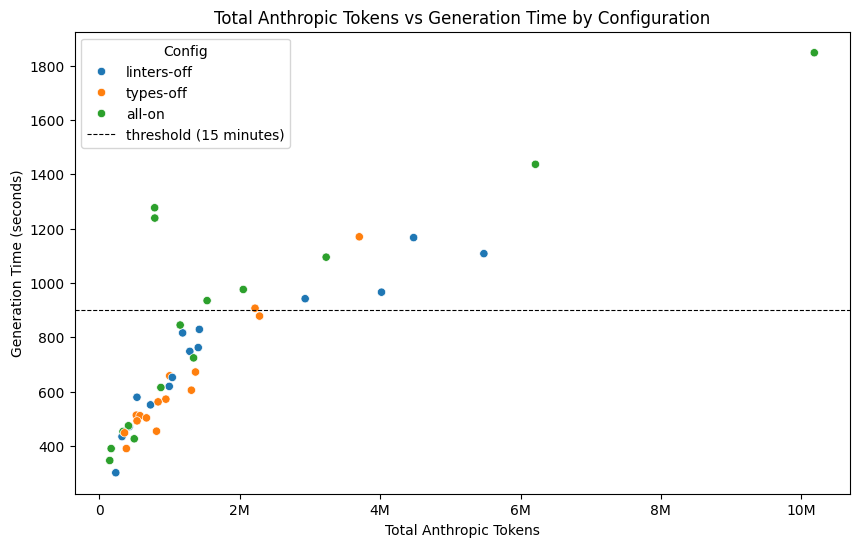

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='anthropic_total_tokens', y='gen_time_seconds', hue='config', data=data, palette='tab10')
plt.title('Total Anthropic Tokens vs Generation Time by Configuration')
plt.xlabel('Total Anthropic Tokens')
plt.ylabel('Generation Time (seconds)')
plt.axhline(y=900, color='black', linewidth=0.8, linestyle='--', label='threshold (15 minutes)')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(human_format))
plt.legend(title='Config')
plt.show()


##### Scatter-plot Observations:
- The scatter plot shows the relationship between total anthropic tokens and generation time for three configurations: **linters-off**, **types-off**, and **all-on**.
- There is a general positive correlation: higher token usage tends to correspond to longer generation times.
- **All-on** configuration (green points) has the highest token consumption and longest generation times, with several points exceeding the 15-minute threshold.
- **Linters-off** (blue points) and **types-off** (orange points) cluster towards lower token usage and shorter generation times.
- **Types-off** generally shows the most efficient performance with lower tokens and faster generation times.
- The 15-minute threshold line highlights that **all-on** frequently exceeds this limit, while **linters-off** and **types-off** mostly stay below it.


---

### **Conclusion:**
- The **types-off** configuration consistently outperforms the others, delivering the fastest generation times and the highest success rate.
- While **linters-off** demonstrates moderate effectiveness, it falls short of the efficiency and reliability exhibited by **types-off**.
- The **all-on** configuration underperforms, characterized by prolonged generation times and a lower success rate.
- Reduced token consumption in **types-off** contributes significantly to its superior speed and overall efficiency.
- In summary, **types-off** represents the optimal configuration, striking the best balance between performance and reliability.